# DS 2500 – Module Assignment 4

Aaron Templeton

U07341119

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

pd.options.display.max_columns = 200

import json

Since the NBA just had the all-star games we will use data collected from the all star games from 2000-2016

The dataset was found on Kaggle - 
 [NBA All Star Game 2000-2016](https://www.kaggle.com/fmejia21/nba-all-star-game-20002016)

Our dataset provides the following:
* **Year** - year of all star game
* **Player** - player name
* **Pos** - player's position
* **HT** - players height
* **WT** - players weight
* **Selection Type** - selection western or eastern
* **NBA Draft Status** - draft year round and pick
* **Nationality** - players nationality

# Reading Data

In [2]:
!curl -L 'https://www.dropbox.com/s/549nzl6tup04lwf/NBA%20All%20Star%20Games.csv?dl=0' > 'nbagames.csv'
nba_games_df = pd.read_csv('nbagames.csv')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72188  100 72188    0     0  67528      0  0:00:01  0:00:01 --:--:-- 67528


In [3]:
nba_games_df.head(5)

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2016.0,Stephen Curry,G,6-3,190.0,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.0,James Harden,SG,6-5,220.0,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.0,Kevin Durant,SF,6-9,240.0,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016.0,Kawhi Leonard,F,6-7,230.0,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.0,Anthony Davis,PF,6-11,253.0,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nba_games_df.drop(nba_games_df.columns[nba_games_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
nba_games_df.head(5)

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016.0,Stephen Curry,G,6-3,190.0,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016.0,James Harden,SG,6-5,220.0,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016.0,Kevin Durant,SF,6-9,240.0,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016.0,Kawhi Leonard,F,6-7,230.0,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016.0,Anthony Davis,PF,6-11,253.0,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


the other dataset we will use for our analysis is the NBA Player stats since 1950 which is found on Kaggle

[NBA Player Stats since 1950](https://www.kaggle.com/drgilermo/nba-players-stats)

This dataset gives us the following:

* index
* YearSeason
* Playername
* PosPosition
* Age
* Tm - Team
* G - Games
* GS - Games Started
* MP -Minutes Played
* PER -Player Efficiency Rating
* TS% - True Shooting %
* 3PAr - 3-Point Attempt Rate
* FTr - Free Throw Rate
* ORB% - Offensive Rebound Percentage
* DRB% - Defensive Rebound Percentage
* TRB% - Total Rebound Percentage
* AST% - Assist Percentage
* STL% - Steal Percentage
* BLK% - Block Percentage
* TOV% - Turnover Percentage
* USG% - Usage Percentage
* OWS - Offensive Win Shares
* DWS - Defensive Win Shares
* WS - Win Shares
* WS/48 - Win Shares Per 48 Minutes
* OBPM - Offensive Box Plus/Minus
* DBPM - Defensive Box Plus/Minus
* BPM - Box Plus/Minus
* VORP - Value Over Replacement
* FG - Field Goals
* FGA - Field Goal Attempts
* FG% - Field Goal Percentage
* 3P - 3 Point Field Goals
* 3PA - 3 Point Field Goal Attempts
* 3P% - 3 Point Field Goal Percentage
* 2P - 2 Point Field Goals
* 2PA - 2 Point Field Goal Attempts
* 2P% - 2 Point Field Goal Percentage
* eFG% - Effective Field Goal Percentage
* FT - Free Throws
* FTA - Free Throw Attempts
* FT% - Free Throw Percentage
* ORB - Offensive Rebounds
* DRB - Defensive Rebounds
* TRB - Total Rebounds
* AST - Assists
* STL - Steals
* BLK - Blocks
* TOV - Turnovers
* PF - Personal Fouls
* PTS - Point

In [5]:
!curl -L "https://www.dropbox.com/s/0qo9gxlc6tfqqnw/Seasons_Stats.csv?dl=0" > 'nba_stats.csv'
nba_stats_df = pd.read_csv('nba_stats.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4997k  100 4997k    0     0  3953k      0  0:00:01  0:00:01 --:--:-- 20.5M


In [6]:
nba_stats_df.head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


#Data Cleaning

now I will clean each dataset, check the null values and remove unecessary columns/fields

In [7]:
nba_games_df.isnull().sum().sort_values()

Year                559
Player              559
Pos                 559
HT                  559
WT                  559
Team                559
Selection Type      559
NBA Draft Status    559
Nationality         559
dtype: int64

In [8]:
nba_games_df.shape

(998, 9)

this should have 439 rows and 9 columns

In [9]:
nba_games_df.tail(5)

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


looks like there is a ton of empty rows. lets drop them

In [10]:
nba_games_df.dropna(inplace=True)
nba_games_df.shape

(439, 9)

now we have the correct dimensions

In [11]:
nba_games_df.isnull().sum().sort_values()

Year                0
Player              0
Pos                 0
HT                  0
WT                  0
Team                0
Selection Type      0
NBA Draft Status    0
Nationality         0
dtype: int64

no null values by we need to change some datatypes

In [0]:
nba_games_df['Year'] = nba_games_df['Year'].apply(lambda x: int(x))

Let's check our other dataset, the stats dataset

we have the right dimension in our dataframe. 

In [13]:
nba_stats_df.shape

(24691, 53)

In [14]:
nba_stats_df.isnull().sum().sort_values()

Unnamed: 0        0
AST              67
FTA              67
FT               67
2PA              67
2P               67
FGA              67
FG               67
PF               67
PTS              67
Year             67
Tm               67
G                67
Player           67
Pos              67
Age              75
WS              106
DWS             106
OWS             106
TS%             153
FG%             166
FTr             166
eFG%            166
2P%             195
TRB             379
MP              553
WS/48           590
PER             590
FT%             925
AST%           2136
TRB%           3120
ORB            3894
DRB            3894
BLK            3894
BPM            3894
VORP           3894
DBPM           3894
OBPM           3894
STL            3894
BLK%           3899
STL%           3899
DRB%           3899
ORB%           3899
TOV            5046
USG%           5051
TOV%           5109
3PA            5764
3P             5764
3PAr           5852
GS             6458


In [0]:
nba_stats_df.drop(columns=['Unnamed: 0', 'blanl', 'blank2'], inplace=True)

In [16]:
nba_stats_df.fillna(0, inplace=True)
nba_stats_df['Year'] = nba_stats_df['Year'].apply(lambda x: int(x))
nba_stats_df.head(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.0,0.368,0.0,0.467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,3.6,3.5,0.0,0.0,0.0,0.0,0.0,144.0,516.0,0.279,0.0,0.0,0.0,144.0,516.0,0.279,0.279,170.0,241.0,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.0,0.435,0.0,0.387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.6,2.2,0.0,0.0,0.0,0.0,0.0,102.0,274.0,0.372,0.0,0.0,0.0,102.0,274.0,0.372,0.372,75.0,106.0,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.0,0.394,0.0,0.259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,2.8,3.6,0.0,0.0,0.0,0.0,0.0,174.0,499.0,0.349,0.0,0.0,0.0,174.0,499.0,0.349,0.349,90.0,129.0,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0


We only want between the year 2000 and 2016, so we will only pull those years

In [17]:
nba_stats_years = nba_stats_df.loc[(nba_stats_df['Year'] >= 2000) & (nba_stats_df['Year'] <= 2016)]
nba_stats_years.head(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14470,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,0.036,0.299,7.0,13.1,10.0,10.0,1.8,1.2,12.7,22.5,0.4,1.8,2.2,0.068,-1.6,0.1,-1.5,0.2,274.0,646.0,0.424,3.0,23.0,0.130,271.0,623.0,0.435,0.426,146.0,193.0,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
14471,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,0.041,0.293,7.0,14.6,10.8,9.7,2.2,0.9,13.0,23.3,0.4,1.6,2.0,0.082,-1.3,0.4,-0.8,0.4,223.0,515.0,0.433,2.0,21.0,0.095,221.0,494.0,0.447,0.435,115.0,151.0,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
14472,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,0.015,0.321,6.9,8.2,7.6,11.0,0.8,2.2,11.3,19.7,0.0,0.2,0.2,0.023,-2.8,-1.0,-3.8,-0.2,51.0,131.0,0.389,1.0,2.0,0.500,50.0,129.0,0.388,0.393,31.0,42.0,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0


In [18]:
print('Now the dataset has {0} rows and {1} columns'.format(nba_stats_years.shape[0], nba_stats_years.shape[1]))

Now the dataset has 9609 rows and 50 columns


In [19]:
nba_stats_years.isnull().sum().sort_values()

Year      0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
BPM       0
DBPM      0
OBPM      0
WS/48     0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
PF        0
FTr       0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
ORB%      0
PTS       0
dtype: int64

we have no null values left in the dataset

lastly, we will convert the height `HT` to a more readable format in inches

In [0]:
nba_games_df['HT'] = nba_games_df['HT'].apply(lambda x: int(x[0]) * 12 + int(x[-1]))

# Combining our datasets into one













### Joining our data

to get a combined dataset, we will left join our `nba_games_df` with `nba_stats_years` on two columns, `Year` and `Player`. 

In [21]:
df = nba_games_df.merge(nba_stats_years,  how='left', on=['Year','Player'])
df.head(5)

,Year,Player,Pos_x,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Pos_y,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2016,Stephen Curry,G,75,190.0,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,PG,27.0,GSW,79.0,79.0,2700.0,31.5,0.669,0.554,0.250,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,805.0,1598.0,0.504,402.0,886.0,0.454,403.0,712.0,0.566,0.630,363.0,400.0,0.908,68.0,362.0,430.0,527.0,169.0,15.0,262.0,161.0,2375.0
1,2016,James Harden,SG,77,220.0,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,SG,26.0,HOU,82.0,82.0,3125.0,25.3,0.598,0.406,0.518,2.2,15.6,8.8,35.4,2.2,1.4,15.9,32.5,10.7,2.6,13.3,0.204,7.1,-0.4,6.7,6.9,710.0,1617.0,0.439,236.0,657.0,0.359,474.0,960.0,0.494,0.512,720.0,837.0,0.860,63.0,438.0,501.0,612.0,139.0,51.0,374.0,229.0,2376.0
2,2016,Kevin Durant,SF,81,240.0,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,SF,27.0,OKC,72.0,72.0,2578.0,28.2,0.634,0.348,0.361,2.0,21.8,12.4,24.2,1.3,2.5,13.5,30.6,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4,698.0,1381.0,0.505,186.0,481.0,0.387,512.0,900.0,0.569,0.573,447.0,498.0,0.898,45.0,544.0,589.0,361.0,69.0,85.0,250.0,137.0,2029.0
3,2016,Kawhi Leonard,F,79,230.0,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,SF,24.0,SAS,72.0,72.0,2380.0,26.0,0.616,0.267,0.306,4.7,18.4,11.8,13.0,2.8,2.3,7.8,25.8,8.3,5.5,13.7,0.277,5.5,2.8,8.3,6.2,551.0,1090.0,0.506,129.0,291.0,0.443,422.0,799.0,0.528,0.565,292.0,334.0,0.874,95.0,398.0,493.0,186.0,128.0,71.0,105.0,133.0,1523.0
4,2016,Anthony Davis,PF,73,253.0,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,C,22.0,NOP,61.0,61.0,2164.0,25.0,0.559,0.095,0.379,6.4,26.4,16.1,10.0,1.8,4.7,8.4,29.6,4.4,2.8,7.2,0.160,1.0,1.2,2.2,2.3,560.0,1136.0,0.493,35.0,108.0,0.324,525.0,1028.0,0.511,0.508,326.0,430.0,0.758,130.0,497.0,627.0,116.0,78.0,125.0,121.0,148.0,1481.0


In [22]:
df.tail(5)

,Year,Player,Pos_x,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Pos_y,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
454,2000,Antonio McDyess,F,81,245.0,Denver Nuggets,Western All-Star Coaches Selection,1995 Rnd 1 Pick 2,United States,PF,25.0,DEN,81.0,81.0,2698.0,19.6,0.539,0.002,0.426,9.4,18.4,13.8,10.9,1.3,3.5,13.8,26.9,3.3,2.9,6.2,0.110,0.3,0.6,0.9,2.0,614.0,1211.0,0.507,0.0,2.0,0.000,614.0,1209.0,0.508,0.507,323.0,516.0,0.626,234.0,451.0,685.0,159.0,69.0,139.0,230.0,316.0,1551.0
455,2000,Gary Payton,G,76,180.0,Seattle SuperSonics,Western All-Star Coaches Selection,1990 Rnd 1 Pick 2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,2000,Rasheed Wallace,FC,73,230.0,Portland Trail Blazers,Western All-Star Coaches Selection,1995 Rnd 1 Pick 4,United States,PF,25.0,POR,81.0,77.0,2845.0,18.1,0.556,0.048,0.317,5.6,17.2,11.7,8.7,1.6,2.8,11.6,21.9,4.6,4.7,9.3,0.156,0.4,1.7,2.1,2.9,542.0,1045.0,0.519,8.0,50.0,0.160,534.0,995.0,0.537,0.522,233.0,331.0,0.704,129.0,437.0,566.0,142.0,87.0,107.0,157.0,216.0,1325.0
457,2000,David Robinson,C,85,250.0,San Antonio Spurs,Western All-Star Coaches Selection,1987 Rnd 1 Pick 1,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2000,Vlade Divac,C,85,260.0,Sacramento Kings,Western All-Star Replacement Selection,1989 Rnd 1 Pick 26,Serbia,C,31.0,SAC,82.0,81.0,2374.0,18.0,0.552,0.034,0.436,7.6,21.3,14.4,15.4,2.1,2.8,17.3,19.3,3.0,4.1,7.2,0.145,-0.1,3.5,3.4,3.2,384.0,764.0,0.503,7.0,26.0,0.269,377.0,738.0,0.511,0.507,230.0,333.0,0.691,174.0,482.0,656.0,244.0,103.0,103.0,190.0,251.0,1005.0


In [23]:
df.loc[df['Player'] == 'Gary Payton']

,Year,Player,Pos_x,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Pos_y,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
402,2002,Gary Payton,G,76,180.0,Seattle SuperSonics,Western All-Star Coaches Selection,1990 Rnd 1 Pick 2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,2001,Gary Payton,G,76,180.0,Seattle SuperSonics,Western All-Star Coaches Selection,1990 Rnd 1 Pick 2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,2000,Gary Payton,G,76,180.0,Seattle SuperSonics,Western All-Star Coaches Selection,1990 Rnd 1 Pick 2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


check for any inconsistencies and null values in our joined dataset

In [24]:
df.isnull().sum().sort_values()

Year                 0
Player               0
Pos_x                0
HT                   0
WT                   0
Team                 0
Selection Type       0
NBA Draft Status     0
Nationality          0
2P                  41
3P%                 41
3PA                 41
3P                  41
VORP                41
FGA                 41
FG                  41
2PA                 41
FG%                 41
2P%                 41
ORB                 41
FT                  41
FTA                 41
FT%                 41
BPM                 41
DRB                 41
TRB                 41
AST                 41
STL                 41
BLK                 41
TOV                 41
eFG%                41
DBPM                41
DWS                 41
WS/48               41
Pos_y               41
Age                 41
Tm                  41
G                   41
GS                  41
MP                  41
PER                 41
TS%                 41
3PAr                41
FTr        

upon inspection of our dataframe, it appears that there are 41 rows of players without stats. We will drop these 41 rows

In [25]:
df.fillna(0, inplace=True)
df.isnull().sum().sort_values()

Year                0
WS/48               0
OBPM                0
DBPM                0
BPM                 0
VORP                0
FG                  0
FGA                 0
FG%                 0
3P                  0
3PA                 0
3P%                 0
2P                  0
2PA                 0
2P%                 0
eFG%                0
FT                  0
FTA                 0
FT%                 0
ORB                 0
DRB                 0
TRB                 0
AST                 0
STL                 0
BLK                 0
TOV                 0
WS                  0
PF                  0
DWS                 0
USG%                0
Player              0
Pos_x               0
HT                  0
WT                  0
Team                0
Selection Type      0
NBA Draft Status    0
Nationality         0
Pos_y               0
Age                 0
Tm                  0
G                   0
GS                  0
MP                  0
PER                 0
TS%       

now our datasets are joined and cleaned, we are ready to begin our analysis

# Exploratory Data Analysis

### Does a player's height affect their free-throw percentage or three-point percentage?


## check the packaging

In [26]:
print("There are {0} rows and {1} columns in our dataset".format(df.shape[0], df.shape[1]))

There are 459 rows and 57 columns in our dataset


## Look at top and bottom of data

In [27]:
df.head(5)

,Year,Player,Pos_x,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Pos_y,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2016,Stephen Curry,G,75,190.0,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,PG,27.0,GSW,79.0,79.0,2700.0,31.5,0.669,0.554,0.250,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,805.0,1598.0,0.504,402.0,886.0,0.454,403.0,712.0,0.566,0.630,363.0,400.0,0.908,68.0,362.0,430.0,527.0,169.0,15.0,262.0,161.0,2375.0
1,2016,James Harden,SG,77,220.0,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,SG,26.0,HOU,82.0,82.0,3125.0,25.3,0.598,0.406,0.518,2.2,15.6,8.8,35.4,2.2,1.4,15.9,32.5,10.7,2.6,13.3,0.204,7.1,-0.4,6.7,6.9,710.0,1617.0,0.439,236.0,657.0,0.359,474.0,960.0,0.494,0.512,720.0,837.0,0.860,63.0,438.0,501.0,612.0,139.0,51.0,374.0,229.0,2376.0
2,2016,Kevin Durant,SF,81,240.0,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,SF,27.0,OKC,72.0,72.0,2578.0,28.2,0.634,0.348,0.361,2.0,21.8,12.4,24.2,1.3,2.5,13.5,30.6,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4,698.0,1381.0,0.505,186.0,481.0,0.387,512.0,900.0,0.569,0.573,447.0,498.0,0.898,45.0,544.0,589.0,361.0,69.0,85.0,250.0,137.0,2029.0
3,2016,Kawhi Leonard,F,79,230.0,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,SF,24.0,SAS,72.0,72.0,2380.0,26.0,0.616,0.267,0.306,4.7,18.4,11.8,13.0,2.8,2.3,7.8,25.8,8.3,5.5,13.7,0.277,5.5,2.8,8.3,6.2,551.0,1090.0,0.506,129.0,291.0,0.443,422.0,799.0,0.528,0.565,292.0,334.0,0.874,95.0,398.0,493.0,186.0,128.0,71.0,105.0,133.0,1523.0
4,2016,Anthony Davis,PF,73,253.0,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,C,22.0,NOP,61.0,61.0,2164.0,25.0,0.559,0.095,0.379,6.4,26.4,16.1,10.0,1.8,4.7,8.4,29.6,4.4,2.8,7.2,0.160,1.0,1.2,2.2,2.3,560.0,1136.0,0.493,35.0,108.0,0.324,525.0,1028.0,0.511,0.508,326.0,430.0,0.758,130.0,497.0,627.0,116.0,78.0,125.0,121.0,148.0,1481.0


In [28]:
df.tail(5)

,Year,Player,Pos_x,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Pos_y,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
454,2000,Antonio McDyess,F,81,245.0,Denver Nuggets,Western All-Star Coaches Selection,1995 Rnd 1 Pick 2,United States,PF,25.0,DEN,81.0,81.0,2698.0,19.6,0.539,0.002,0.426,9.4,18.4,13.8,10.9,1.3,3.5,13.8,26.9,3.3,2.9,6.2,0.110,0.3,0.6,0.9,2.0,614.0,1211.0,0.507,0.0,2.0,0.000,614.0,1209.0,0.508,0.507,323.0,516.0,0.626,234.0,451.0,685.0,159.0,69.0,139.0,230.0,316.0,1551.0
455,2000,Gary Payton,G,76,180.0,Seattle SuperSonics,Western All-Star Coaches Selection,1990 Rnd 1 Pick 2,United States,0,0.0,0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,2000,Rasheed Wallace,FC,73,230.0,Portland Trail Blazers,Western All-Star Coaches Selection,1995 Rnd 1 Pick 4,United States,PF,25.0,POR,81.0,77.0,2845.0,18.1,0.556,0.048,0.317,5.6,17.2,11.7,8.7,1.6,2.8,11.6,21.9,4.6,4.7,9.3,0.156,0.4,1.7,2.1,2.9,542.0,1045.0,0.519,8.0,50.0,0.160,534.0,995.0,0.537,0.522,233.0,331.0,0.704,129.0,437.0,566.0,142.0,87.0,107.0,157.0,216.0,1325.0
457,2000,David Robinson,C,85,250.0,San Antonio Spurs,Western All-Star Coaches Selection,1987 Rnd 1 Pick 1,United States,0,0.0,0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458,2000,Vlade Divac,C,85,260.0,Sacramento Kings,Western All-Star Replacement Selection,1989 Rnd 1 Pick 26,Serbia,C,31.0,SAC,82.0,81.0,2374.0,18.0,0.552,0.034,0.436,7.6,21.3,14.4,15.4,2.1,2.8,17.3,19.3,3.0,4.1,7.2,0.145,-0.1,3.5,3.4,3.2,384.0,764.0,0.503,7.0,26.0,0.269,377.0,738.0,0.511,0.507,230.0,333.0,0.691,174.0,482.0,656.0,244.0,103.0,103.0,190.0,251.0,1005.0


## Check the "n's"

should be 418 rows of data

In [29]:
df['Player'].count()

459

games should be between 2000 and 2016

In [30]:
mask = df.loc[(df['Year'] >= 2000) & (df['Year'] <= 2016)]
if mask['Year'].count() == df['Year'].count():
  print("All games between 2000 and 2016")
else:
  print("Some games not between 2000 and 2016")

All games between 2000 and 2016


all players should be in a game. there are 17 games

In [31]:
year = df.groupby('Year')['Year']
year.count()

Year
2000    28
2001    26
2002    27
2003    26
2004    24
2005    27
2006    29
2007    26
2008    30
2009    32
2010    25
2011    29
2012    25
2013    25
2014    28
2015    28
2016    24
Name: Year, dtype: int64

there are only two main selections: western and eastern, but 6 selection types in total

In [32]:
df['Selection Type'].value_counts().sort_values()

Eastern All-Star Replacement Selection     16
Western All-Star Replacement Selection     17
Western All-Star Fan Vote Selection        85
Eastern All-Star Fan Vote Selection        87
Western All-Star Coaches Selection        125
Eastern All-Star Coaches Selection        129
Name: Selection Type, dtype: int64

## Validate against external source

The starting Western Conference All-Stars in 2016 were: Stephen Curry, Russell Westbrook, Kobe Bryant, Kevin Durant, Kawhi Leonard

In [33]:
west2016 = df.loc[(df['Year'] == 2016)]
starters = ["Stephen Curry", "Russell Westbrook", "Kobe Bryant", "Kevin Durant", "Kawhi Leonard"]
west2016.loc[west2016['Player'].isin(starters)]

,Year,Player,Pos_x,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Pos_y,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2016,Stephen Curry,G,75,190.0,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,PG,27.0,GSW,79.0,79.0,2700.0,31.5,0.669,0.554,0.250,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,805.0,1598.0,0.504,402.0,886.0,0.454,403.0,712.0,0.566,0.630,363.0,400.0,0.908,68.0,362.0,430.0,527.0,169.0,15.0,262.0,161.0,2375.0
2,2016,Kevin Durant,SF,81,240.0,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,SF,27.0,OKC,72.0,72.0,2578.0,28.2,0.634,0.348,0.361,2.0,21.8,12.4,24.2,1.3,2.5,13.5,30.6,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4,698.0,1381.0,0.505,186.0,481.0,0.387,512.0,900.0,0.569,0.573,447.0,498.0,0.898,45.0,544.0,589.0,361.0,69.0,85.0,250.0,137.0,2029.0
3,2016,Kawhi Leonard,F,79,230.0,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,SF,24.0,SAS,72.0,72.0,2380.0,26.0,0.616,0.267,0.306,4.7,18.4,11.8,13.0,2.8,2.3,7.8,25.8,8.3,5.5,13.7,0.277,5.5,2.8,8.3,6.2,551.0,1090.0,0.506,129.0,291.0,0.443,422.0,799.0,0.528,0.565,292.0,334.0,0.874,95.0,398.0,493.0,186.0,128.0,71.0,105.0,133.0,1523.0
5,2016,Russell Westbrook,G,75,200.0,Oklahoma City Thunder,Western All-Star Coaches Selection,2008 Rnd 1 Pick 4,United States,PG,27.0,OKC,80.0,80.0,2750.0,27.6,0.554,0.236,0.397,6.1,18.1,12.4,49.6,2.9,0.6,16.8,31.6,10.0,4.0,14.0,0.245,7.6,2.4,10.0,8.3,656.0,1444.0,0.454,101.0,341.0,0.296,555.0,1103.0,0.503,0.489,465.0,573.0,0.812,145.0,481.0,626.0,834.0,163.0,20.0,342.0,200.0,1878.0


We are missing Kobe Bryant from 2016

the starting Eastern Conference All-Stars in 2016 were: Kyle Lowry, Paul George, Carmelo Anthony, Dwyane Wade, LeBron James

In [34]:
east2016 = df.loc[(df['Year'] == 2016)]
starters = ["Kyle Lowry", "Paul George", "Carmelo Anthony", "Dwyane Wade", "LeBron James"]
east2016.loc[east2016['Player'].isin(starters)]


,Year,Player,Pos_x,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Pos_y,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14,2016,LeBron James,F,80,250.0,Cleveland Cavaliers,Eastern All-Star Fan Vote Selection,2003 Rnd 1 Pick 1,United States,SF,31.0,CLE,76.0,76.0,2709.0,27.5,0.588,0.199,0.347,4.7,18.8,11.8,36.0,2.0,1.5,13.2,31.4,9.6,4.0,13.6,0.242,6.9,2.3,9.1,7.6,737.0,1416.0,0.520,87.0,282.0,0.309,650.0,1134.0,0.573,0.551,359.0,491.0,0.731,111.0,454.0,565.0,514.0,104.0,49.0,249.0,143.0,1920.0
20,2016,Kyle Lowry,PG,72,205.0,Toronto Raptors,Eastern All-Star Coaches Selection,2006 Rnd 1 Pick 24,United States,PG,29.0,TOR,77.0,77.0,2851.0,22.2,0.578,0.457,0.410,2.2,12.3,7.3,29.9,2.9,1.0,13.7,26.1,8.0,3.7,11.6,0.196,6.2,0.6,6.8,6.3,512.0,1198.0,0.427,212.0,547.0,0.388,300.0,651.0,0.461,0.516,398.0,491.0,0.811,55.0,310.0,365.0,494.0,158.0,34.0,225.0,211.0,1634.0
21,2016,Paul George,GF,81,220.0,Indiana Pacers,Eastern All-Star Coaches Selection,2010 Rnd 1 Pick 10,United States,SF,25.0,IND,81.0,81.0,2819.0,20.9,0.557,0.391,0.364,3.1,18.7,10.9,20.3,2.7,0.8,13.6,30.4,4.4,4.8,9.2,0.157,3.5,1.0,4.5,4.6,605.0,1449.0,0.418,210.0,566.0,0.371,395.0,883.0,0.447,0.490,454.0,528.0,0.860,79.0,484.0,563.0,329.0,152.0,29.0,265.0,230.0,1874.0


our data is missing Carmelo Anthony and Dwyane Wade for 2016

in the 2016 season LeBron James had 1920 points

In [35]:
lbj = east2016.loc[east2016['Player'] == "LeBron James"]
lbj['PTS'].sum()

1920.0

in the 2010 season Kobe Bryant made 99 three pointers

In [36]:
s2010 = df.loc[df['Year'] == 2010]
kobe = s2010.loc[s2010['Player'] == "Kobe Bryant"]
kobe['3P'].sum()

99.0

in the 2014 season, Damian Lillard played for Trail Blazers 

In [37]:
s2014 = df.loc[df['Year'] == 2014]
dam = s2014.loc[s2014['Player'] == "Damian Lillard"]
dam['Team'].sum()

'Portland Trail Blazers'

## Make a Plot

the plot below shows the number all-stars each team has had between 2000 and 2016

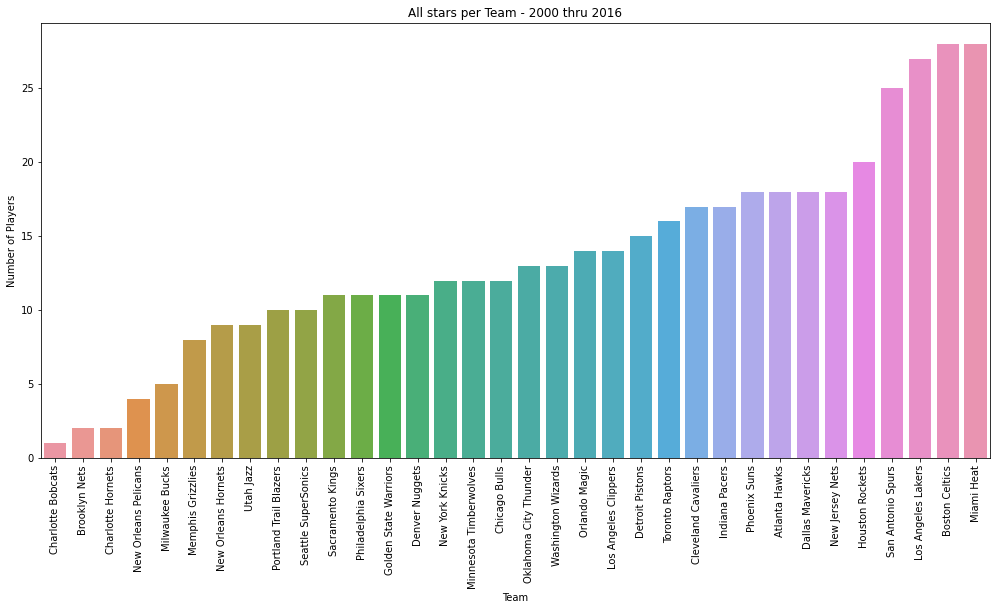

In [38]:
teams = df.groupby(['Team']).count()['Year'].sort_values()
plt.figure(figsize=(17,8))
ax = sb.barplot(x=teams.index, y=teams)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = ax.set_title("All stars per Team - 2000 thru 2016")
lb = ax.set(xlabel="Team", ylabel="Number of Players")

this plot depicts the nationality of all of the all star players, The US will be the clear winner, but its good to see some variety here

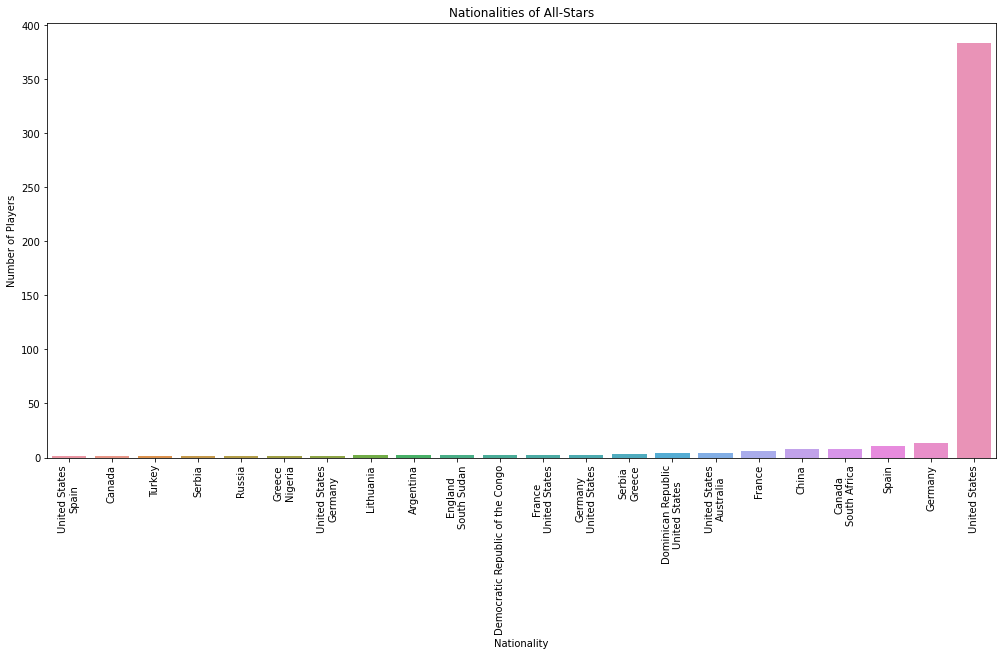

In [39]:
nation = df.groupby(['Nationality']).count()['Year'].sort_values()
plt.figure(figsize=(17,8))
ax = sb.barplot(x=nation.index, y=nation)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title = ax.set_title("Nationalities of All-Stars")
lb = ax.set(xlabel="Nationality", ylabel="Number of Players")

here is an age distribution of the all-stars between 2000-2016

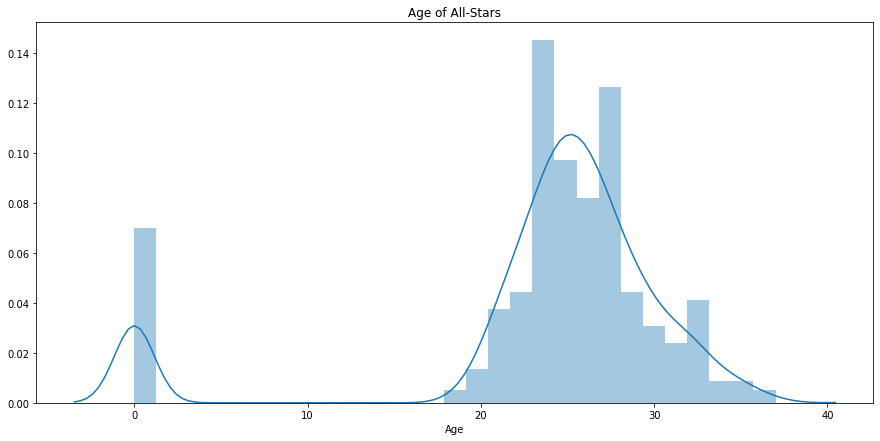

In [40]:
plt.figure(figsize=(15,7))
ax = sb.distplot(df['Age'])
t = ax.set_title("Age of All-Stars")

here is a distribution of the players heights

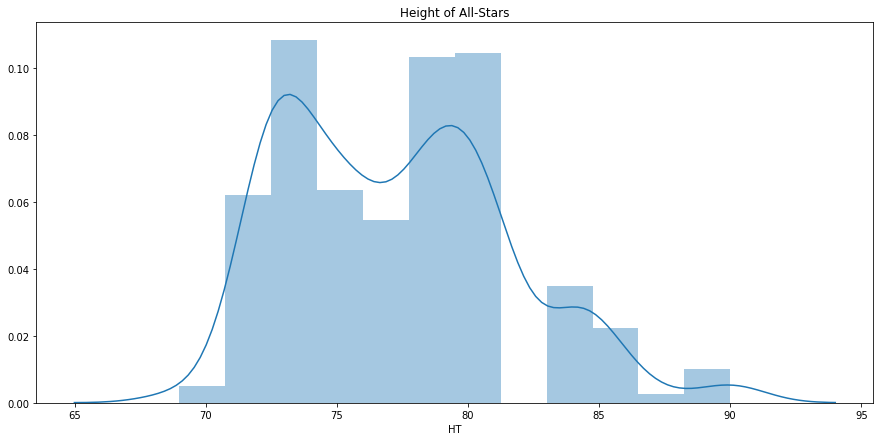

In [41]:
plt.figure(figsize=(15,7))
ax = sb.distplot(df['HT'])
t = ax.set_title("Height of All-Stars")

## Solution and statistical test

### Does a player's height affect their free-throw percentage or three-point percentage?

to answer our question we will use 2 pearson correlation tests to test the correlation between height and free-throw percentage and for height and three-point percentage?

In [42]:
freethrow_df = df.groupby('Player')['HT','FT%'].sum()
freethrow_df.head(5)
pearson_ft = freethrow_df.corr(method='pearson')
pearson_ft

,HT,FT%
HT,1.000000,0.898505
FT%,0.898505,1.000000


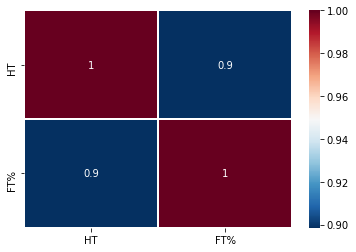

In [43]:
sb.heatmap(pearson_ft, 
            xticklabels=pearson_ft.columns,
            yticklabels=pearson_ft.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

based on our test, there is an extremely high correlation between the players heights and free throw percentage

now we will do the test for the height and 3 point percentage

In [44]:
three_df = df.groupby('Player')['HT','3P%'].sum()
three_df.head(5)
pearson_tp = three_df.corr(method='pearson')
pearson_tp

,HT,3P%
HT,1.000000,0.853862
3P%,0.853862,1.000000


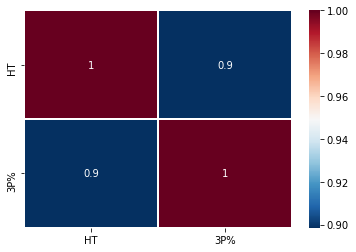

In [45]:
sb.heatmap(pearson_ft, 
            xticklabels=pearson_tp.columns,
            yticklabels=pearson_tp.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

the correlation between the height and three point percentage is also extremely high

## Conclusion

I chose the datasets about the NBA for several reasons: I enjoy basketball and watching the NBA, the data was easily available and could be joined easily on players stats and all-stars in the NBA from 2000 through 2016

the data for the all-stars contained basic information about the players who were NBA all-stars during 2000-2016. I discovered in my assignment that not all of the players were included, so the data is incomplete but I chose to work with what I had.

the data for the stats was completely seperate from the all-stars data, however, it was the players stats for every year so it was easy to join the two datasets using the year and the players name. I ended up doing a left join on the all-stars data by players name and the year, which resulted in a dataset that contained the players information and statistics for every year they were in the all-stars games

I chose to ask two very similar questions about my joined dataset: 1) does the players height correlate with the free throw percentage and 2) does height correlate with 3 point percentage

both tests ended with very high correlations to height. I can confidently conclude that a player's 3 point percentage and free throw percentage greatly relate and depend on the players height.